<a href="https://colab.research.google.com/github/gakurujnr/Autolib-electric-car-sharing-service-company/blob/master/Moringa_Data_Science_Core_W3_Independent_Project_2019_08_Peter_Gakuru_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Question

To determine which day of the week blue cars are most popular

## Metrics For Success

## Context

## Experimental Designs

## All Imports

In [0]:
## Importing libraries

#Import pandas
import pandas as pd

#Importing numpy
import numpy as np

# Import matplotlid
import matplotlib.pyplot as plt
%matplotlib inline

##Import seaborn
import seaborn as sns

# pandas profiling provides a summary report, including descriptive statistics of the dataset 
import pandas_profiling as pr

## Loading Data

In [3]:
## Loading the dataset
blu = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
blu.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [5]:
## load the the dictionary of the dataset
dictionary = pd.read_excel("/content/columns_explanation.xlsx")
dictionary

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [6]:
## View information of our data
blu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [7]:
## Viewing the size of the data
len(blu)

16085

In [8]:
## Viewing the shape of the dataset in rows and columns
blu.shape

## Has 16085 rows and 13 columns

(16085, 13)

In [9]:
## Viewing the data types of the dataset
blu.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

## Tidyng the dataset 

In [11]:
## Creating a copy of dataset to work on and not altering or affecting the original data
bl = blu.copy()
bl.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [12]:
# Checking the columns
bl.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [13]:
## Replacing and writing columns in lower case
bl.columns = bl.columns.str.lower().str.replace(' ', '_')
bl.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [0]:
## Renaming inappropriate column names
bl.rename(columns = {"n_daily_data_points": "daily_data_points", "dayofweek": "day_of_week"}, inplace = True)

In [15]:
## Checking if the column names have changed
bl.columns

Index(['postal_code', 'date', 'daily_data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [16]:
## Checking the sum for duplicate values in the dataset
bl.duplicated().sum()

## The dataset has no duplicate values

0

### Checking Null Values

In [17]:
## Checking if there are any null values
bl.isnull().sum()

## There are no null/missing values on this dataset

postal_code               0
date                      0
daily_data_points         0
day_of_week               0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

There are no null values in the dataset

In [18]:
bl.dtypes

postal_code                int64
date                      object
daily_data_points          int64
day_of_week                int64
day_type                  object
bluecars_taken_sum         int64
bluecars_returned_sum      int64
utilib_taken_sum           int64
utilib_returned_sum        int64
utilib_14_taken_sum        int64
utilib_14_returned_sum     int64
slots_freed_sum            int64
slots_taken_sum            int64
dtype: object

In [19]:
# converting date column to datetime
bl.date = pd.to_datetime(bl.date)

bl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
postal_code               16085 non-null int64
date                      16085 non-null datetime64[ns]
daily_data_points         16085 non-null int64
day_of_week               16085 non-null int64
day_type                  16085 non-null object
bluecars_taken_sum        16085 non-null int64
bluecars_returned_sum     16085 non-null int64
utilib_taken_sum          16085 non-null int64
utilib_returned_sum       16085 non-null int64
utilib_14_taken_sum       16085 non-null int64
utilib_14_returned_sum    16085 non-null int64
slots_freed_sum           16085 non-null int64
slots_taken_sum           16085 non-null int64
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 1.6+ MB


In [20]:
## checking if the date column has converted
bl.head(3)

,postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27


In [0]:
## 
# selecting columns day_type = weekday as will be working with weekdays only

bl = bl[bl['day_type'] == 'weekday']

In [22]:
## Preview some of the dataset to see if it has selected the data_type weekday
bl.head()

,postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20


In [0]:
## # Dropping irrelevant columns that is not needed in our dataset as it's not of any use
bl.drop(columns=['daily_data_points', 'day_type'], inplace=True)


In [25]:
## Confirm if the column is dropped
bl.columns

Index(['postal_code', 'date', 'day_of_week', 'bluecars_taken_sum',
       'bluecars_returned_sum', 'utilib_taken_sum', 'utilib_returned_sum',
       'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

## Checking For Outliers

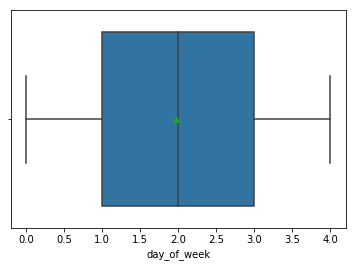

In [26]:
##
sns.boxplot(bl['day_of_week'], showmeans = True)

The days of the week column has no outliers and has its mean exactly at 2.0

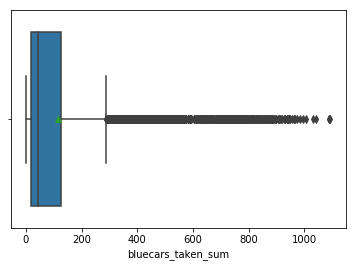

In [27]:
# checking outliers in bluecars_taken_sum
sns.boxplot(bl['bluecars_taken_sum'], showmeans = True)

Has outliers. I wont drop the outliers as the blue cars that were taken sum is 1400

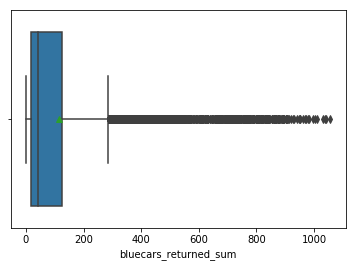

In [28]:
# bluecars_returned_sum 
sns.boxplot(bl['bluecars_returned_sum'], showmeans = True)

Has outliers. I wont drop the outliers as the blue cars that were taken sum is 1400

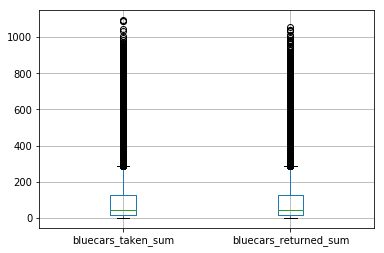

In [29]:
## Boxplot that shows outliers of the bluecars_taken_sum and bluecars_returned_sum
boxplot = bl.boxplot(["bluecars_taken_sum","bluecars_returned_sum"])
plt.show()

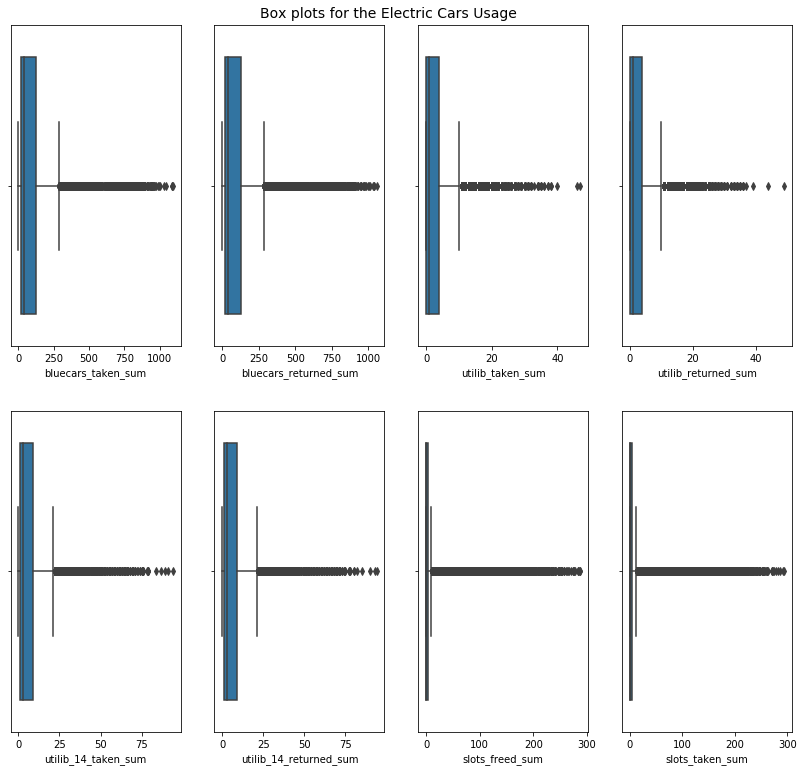

In [34]:
##
# checking for outliers in columns[3:]

box, zzx = plt.subplots(2,4, figsize=(14,13))
box.suptitle('Box plots for the Electric Cars Usage', fontsize=14, y=0.9)

for ax, column in zip(zzx.flatten(), bl.columns[3:]):    
  sns.boxplot(bl[column], ax = ax)
  


Boxplots indicates there are many outliers in plotted columns
But, we won't drop the outliers since they are reasonable outliers 

In [37]:
##
# Removing outliers from the created dataframe using IQR
for c in bl.columns[5:]:
  Q1 = bl[c].quantile(0.25)
  Q3 = bl[c].quantile(0.75)
  
  IQR = Q3 - Q1
  
bl1 = bl[~((bl[c] < Q1 - 1.5*IQR) | (bl[c] > Q3 + 1.5*IQR))]
bl1.head()

,postal_code,date,day_of_week,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
22,75001,2018-01-23,1,112,113,3,3,10,10,11,9
29,75001,2018-01-30,1,103,103,2,2,3,3,11,11
36,75001,2018-02-06,1,118,118,4,4,3,3,12,11
49,75001,2018-02-19,0,85,86,1,1,9,9,12,12
50,75001,2018-02-20,1,100,98,3,3,9,9,11,11


In [38]:
bl1.tail()

,postal_code,date,day_of_week,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
16078,95880,2018-06-13,2,12,13,0,0,1,1,0,0
16079,95880,2018-06-14,3,15,13,0,0,0,0,0,0
16080,95880,2018-06-15,4,15,10,0,0,2,3,0,0
16083,95880,2018-06-18,0,11,14,3,5,2,2,0,0
16084,95880,2018-06-19,1,2,2,2,1,0,0,0,0


In [39]:
##
## Pandas profiling 
# import pandas_profiling
pr.ProfileReport(bl)

Number of variables,12
Number of observations,11544
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,96.0 B
Numeric,5
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,6


This variable is highly correlated with bluecars_taken_sum and should be ignored for analysis

## Exploratory Data Analysis

In [40]:
# checking for the sum of bluecars taken in each day of the week

bl.groupby('day_of_week')[['bluecars_taken_sum']].sum().sort_values('bluecars_taken_sum', ascending=False)

,bluecars_taken_sum
day_of_week,
4,288546
0,263893
3,263207
1,261940
2,261849


Most blue cars are taken on Friday by a sum of 288546
Least cars were taken on Wednesday by a sum of 261849